# Import needed packages

In [1]:
import numpy as np
from scipy.sparse.linalg import expm_multiply
import matplotlib.pyplot as plt

plt.style.use('seaborn-talk')
plt.rcParams.update({'figure.dpi': 120,'figure.figsize': (6,4)})     

from pyQME.spectral_density import SpectralDensity
from pyQME.linear_spectra import HCE
from pyQME.tensors import RelTensorMarkov
from pyQME.utils import overdamped_brownian,underdamped_brownian

# Define the system

**Hamiltonian (1/cm)**

In [2]:
nchrom = 2 #num. of chromophores

coupling = 100
E0 = 10000
energy_gap = 478
H = np.zeros((nchrom,nchrom)) #hamiltonian

H[0] = np.asarray([E0      ,coupling     ])
H[1] = np.asarray([coupling,E0+energy_gap])

In [3]:
H

array([[10000.,   100.],
       [  100., 10478.]])

**Equilibrium density matrix (before fluorescence)**

In [4]:
rho_eq_exc = np.diag([1/nchrom +0*1j]*nchrom) #exciton basis

**Transition dipoles (Debye)**

In [5]:
dipoles = np.ones([nchrom,3])

**Temperature (Kelvin)**

In [6]:
temp = 200

**Spectral density**

In [7]:
freq_axis_SD = np.arange(0.1,4000,0.1) 

In [8]:
SD_data = overdamped_brownian(freq_axis_SD,30,37)
SD_data = SD_data + underdamped_brownian(freq_axis_SD,5,50,518)

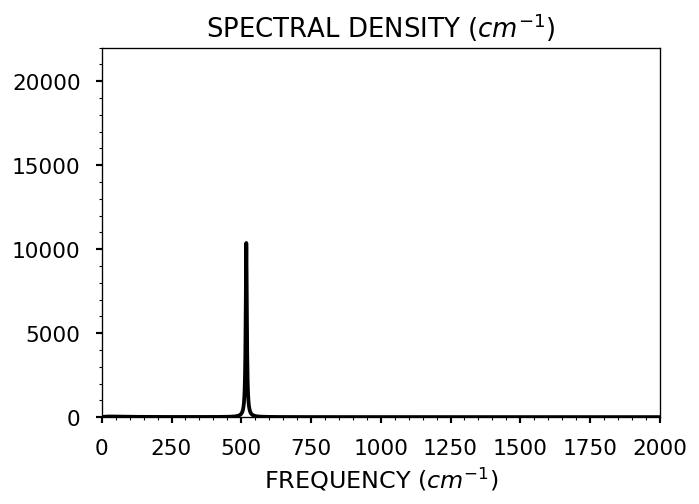

In [9]:
plt.plot(freq_axis_SD,SD_data,color='black');
plt.xlim(0,2000);
plt.ylim(0,22000)
plt.title('SPECTRAL DENSITY ($cm^{-1}$)');
plt.xlabel('FREQUENCY ($cm^{-1}$)');
plt.minorticks_on()

In [10]:
SD_obj = SpectralDensity(freq_axis_SD,SD_data,temperature=temp)

In [11]:
SD_obj._calc_Gamma_HCE_loop_over_time()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9153/9153 [00:03<00:00, 2476.13it/s]


**Relaxation Tensor (Complex Redfield)**

In [12]:
rel_tens_obj = RelTensorMarkov(H,SD_obj)

# Spectrum calculation

In [18]:
spectrum_obj = HCE(rel_tens_obj)   #I didn't check the convergence of this spectrum

In [19]:
freq_axis_FL,FL = spectrum_obj.calc_FL(dipoles,rho_eq_exc)   #to be saved

In [20]:
spectrum_obj = HCE(rel_tens_obj)   #I didn't check the convergence of this spectrum

In [21]:
freq_axis_FL,FL = spectrum_obj.calc_FL(dipoles,rho_eq_exc)   #to be saved

# Check the results

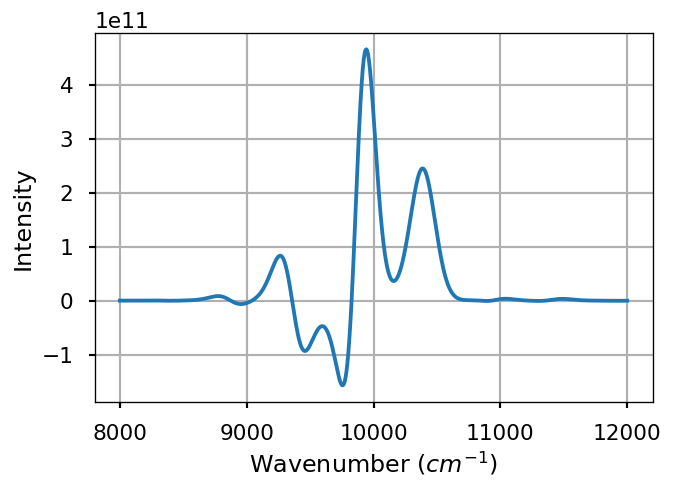

In [22]:
plt.plot(freq_axis_FL,FL)
#plt.xlim(8000,11000)
plt.xlabel('Wavenumber ($cm^{-1}$)');
plt.ylabel('Intensity');
plt.grid()